In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


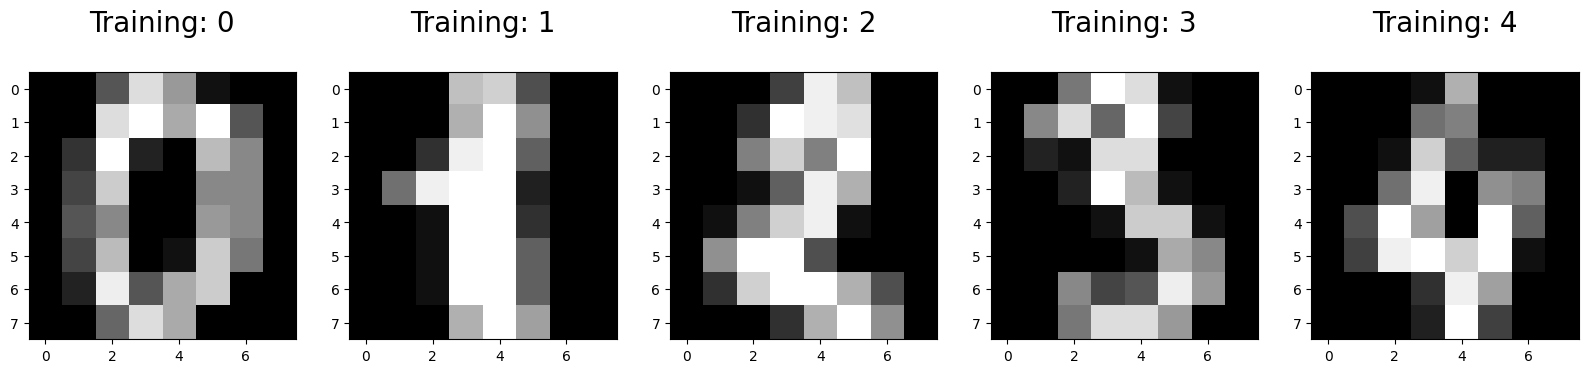

In [28]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" %label, fontsize=20)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test=train_test_split(digits.data, digits.target, test_size=0.25)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()

In [34]:
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred=model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
score=accuracy_score(y_test,y_pred)
score

0.96

In [41]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  1,  0,  4],
       [ 0,  1,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 44,  0,  1],
       [ 0,  5,  0,  0,  1,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 29]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score 0.96')

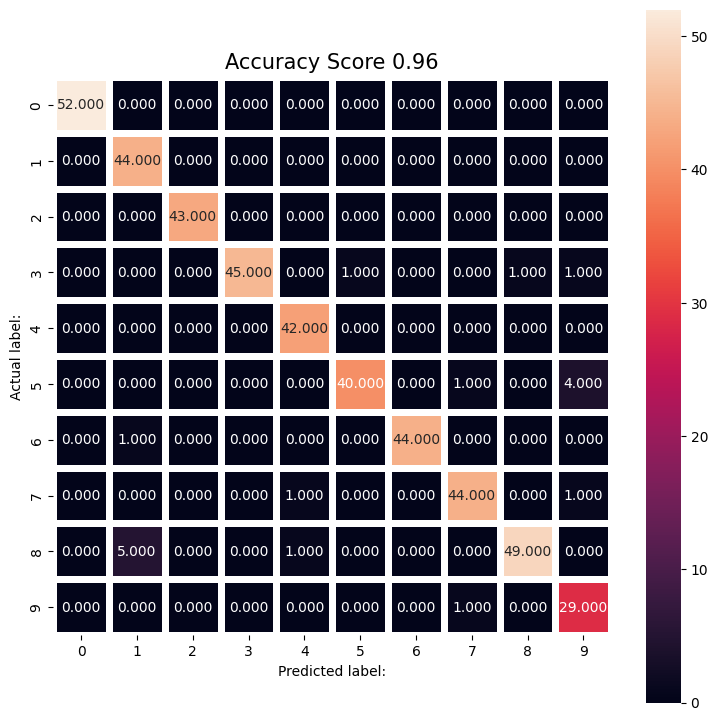

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=5, square=True)
plt.ylabel('Actual label:')
plt.xlabel('Predicted label:')
all_sample_title='Accuracy Score {0}'.format(score)
plt.title(all_sample_title, size=15)

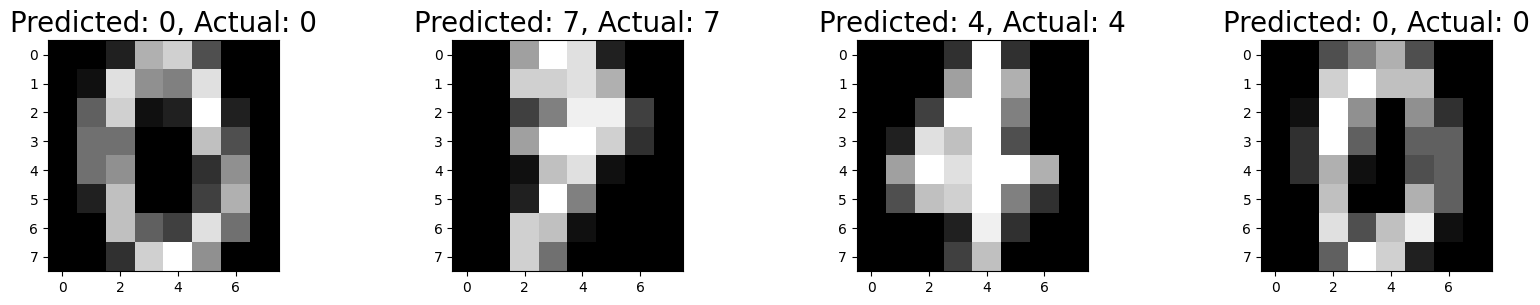

In [50]:
index=0
classifiedIndex=[]
for predict, actual in zip(y_pred, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[wrong], y_test[wrong]), fontsize=20)